# Company Bankruptcy Detection

## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

## 1. Data Load and Analysis

In [2]:
path = r'C:\MLDatasets\bankruptcy.csv' #Adjust to your own dataset path.
dataBankruptcy = pd.read_csv(path)
dataBankruptcy

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
dataBankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
dataBankruptcy.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
dataBankruptcy.shape

(6819, 96)

In [6]:
dataBankruptcy.isnull().sum().sort_values(ascending=False)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
                                                           ..
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
 After-tax Net Profit Growth Rate                           0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
print("Any column with null values?", dataBankruptcy.isnull().any().any())

Any column with null values? False


## 2. Preprocessing

### 2.1 Oversampling

Oversampling is a process of selecting samples that duplicates the samples of the minority classes. This practice is sometimes used in unbalanced datasets in which one class has significantly more sample and the other classes only has little amounts of samples.

In [8]:
classValCounts = dataBankruptcy['Bankrupt?'].value_counts()
classValCounts

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [9]:
dataCount = classValCounts.sum()

In [10]:
print("Proportions of dataset classes:")
print("Class 0:", classValCounts[0]/dataCount)
print("Class 1:", classValCounts[1]/dataCount)

Proportions of dataset classes:
Class 0: 0.967737204868749
Class 1: 0.03226279513125092


In this case. We can clearly see that the dataset is massively unbalanced with 96.8% of the dataset belonging to class 0 and only 3.2% of the dataset belongs to class 1

Therefore we need to oversample the data to have enough data for the model to have a higher f-1 score and is able to properly classify class 1 inputs

In [11]:
data = dataBankruptcy.drop(['Bankrupt?'], axis=1)
target = dataBankruptcy['Bankrupt?']

print(data.shape)
print(target.shape)

(6819, 95)
(6819,)


In [12]:
train_data_u, test_data_u, train_target_u, test_target_u = train_test_split(data, target, test_size=0.4, random_state=1)

# Random OverSampler Data.
train_data_u_ros, test_data_u_ros, train_target_u_ros, test_target_u_ros = train_data_u, test_data_u, train_target_u, test_target_u

Two oversampling methods would be used in this project, which are `SMOTE` and `RandomOverSampler`

The model would be fitted and evaluated separately for each sample groups

In [13]:
smote = SMOTE(sampling_strategy='minority', random_state=1)
data_smote, target_smote = smote.fit_resample(data, target)

print(data_smote.shape)
print(target_smote.shape)

(13198, 95)
(13198,)


In [14]:
randomOverSampler = RandomOverSampler(random_state=1)
data_ros, target_ros = randomOverSampler.fit_resample(data, target)

print(data_ros.shape)
print(target_ros.shape)

(13198, 95)
(13198,)


In [15]:
target_smote.value_counts()

0    6599
1    6599
Name: Bankrupt?, dtype: int64

In [16]:
target_ros.value_counts()

0    6599
1    6599
Name: Bankrupt?, dtype: int64

### 2.2 Train Test Split

#### 2.2.1 SMOTE Data

In [17]:
train_data, test_data, train_target, test_target = train_test_split(
    data_smote, target_smote, test_size=0.4, random_state=1
)

In [18]:
print("SMOTE Data:")
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("Training Target Shape:", train_target.shape)
print("Test Target Shape:", test_target.shape)

SMOTE Data:
Training Data Shape: (7918, 95)
Test Data Shape: (5280, 95)
Training Target Shape: (7918,)
Test Target Shape: (5280,)


#### 2.2.2 Random OverSampler Data

In [19]:
train_data_ros, test_data_ros, train_target_ros, test_target_ros = train_test_split(
    data_ros, target_ros, test_size=0.4, random_state=1
)

In [20]:
print("Random OverSampling Data:")
print("Training Data Shape:", train_data_ros.shape)
print("Test Data Shape:", test_data_ros.shape)
print("Training Target Shape:", train_target_ros.shape)
print("Test Target Shape:", test_target_ros.shape)

Random OverSampling Data:
Training Data Shape: (7918, 95)
Test Data Shape: (5280, 95)
Training Target Shape: (7918,)
Test Target Shape: (5280,)


### 2.3 Scaling: Standardization

#### 2.3.1 SMOTE Data

In [21]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data_scaled = scaler.transform(train_data)
print(train_data_scaled)
print("Mean xs = ", np.round(np.mean(train_data_scaled)))
print("Std dev xs = ", np.round(np.std(train_data_scaled)))

test_data_scaled = scaler.transform(test_data)

test_data_u = scaler.transform(test_data_u)

[[ 4.21145400e-01  1.94031692e-01  3.94915875e-01 ... -3.68578900e+00
   0.00000000e+00 -2.37977519e-01]
 [ 3.50572361e-01  5.23195643e-01  3.75059542e-01 ...  5.82726124e-02
   0.00000000e+00  1.21795464e-01]
 [-5.23355389e-02  1.71122845e-01 -7.50581432e-03 ...  1.15473417e+01
   0.00000000e+00  1.24361109e-01]
 ...
 [ 8.20203861e-01  8.48742409e-01  8.23812676e-01 ... -5.90673001e-03
   0.00000000e+00 -2.84105031e-01]
 [-1.74217016e+00 -1.75805231e+00 -1.96848867e+00 ... -2.00413195e-02
   0.00000000e+00  3.23682451e+00]
 [-1.22833901e+00 -1.25525428e+00 -1.30213875e+00 ... -6.51022539e-02
   0.00000000e+00 -3.96429411e-01]]
Mean xs =  -0.0
Std dev xs =  1.0


#### 2.3.2 Random OverSampler Data

In [22]:
scaler = StandardScaler()
scaler.fit(train_data_ros)
train_data_scaled_ros = scaler.transform(train_data_ros)
print(train_data_scaled)
print("Mean xs = ", np.round(np.mean(train_data_scaled_ros)))
print("Std dev xs = ", np.round(np.std(train_data_scaled_ros)))

test_data_scaled_ros = scaler.transform(test_data_ros)

test_data_u_ros = scaler.transform(test_data_u_ros)

[[ 4.21145400e-01  1.94031692e-01  3.94915875e-01 ... -3.68578900e+00
   0.00000000e+00 -2.37977519e-01]
 [ 3.50572361e-01  5.23195643e-01  3.75059542e-01 ...  5.82726124e-02
   0.00000000e+00  1.21795464e-01]
 [-5.23355389e-02  1.71122845e-01 -7.50581432e-03 ...  1.15473417e+01
   0.00000000e+00  1.24361109e-01]
 ...
 [ 8.20203861e-01  8.48742409e-01  8.23812676e-01 ... -5.90673001e-03
   0.00000000e+00 -2.84105031e-01]
 [-1.74217016e+00 -1.75805231e+00 -1.96848867e+00 ... -2.00413195e-02
   0.00000000e+00  3.23682451e+00]
 [-1.22833901e+00 -1.25525428e+00 -1.30213875e+00 ... -6.51022539e-02
   0.00000000e+00 -3.96429411e-01]]
Mean xs =  -0.0
Std dev xs =  1.0


### 2.4 Dimensionality Reduction: PCA

#### 2.4.1 SMOTE Data

In [23]:
# Choose PCs such that retained total variance > 99%
pca = PCA(n_components=0.99, random_state=1)
pca.fit(train_data_scaled)
r = pca.n_components_
print('The number of selected PCs:', r)

The number of selected PCs: 62


In [24]:
train_data_pca = pca.transform(train_data_scaled)
test_data_pca = pca.transform(test_data_scaled)
test_data_u = pca.transform(test_data_u)

print(train_data_pca.shape)
print(test_data_pca.shape)

(7918, 62)
(5280, 62)


In [25]:
train_data_prep = train_data_pca
test_data_prep = test_data_pca

To avoid warnings of named columns

In [26]:
train_target = train_target.to_numpy()
test_target = test_target.to_numpy()

#### 2.4.2 Random OverSampler Data

In [27]:
# Choose PCs such that retained total variance > 99%
pca = PCA(n_components=0.99, random_state=1)
pca.fit(train_data_scaled_ros)
r = pca.n_components_
print('The number of selected PCs:', r)

The number of selected PCs: 62


In [28]:
train_data_pca_ros = pca.transform(train_data_scaled_ros)
test_data_pca_ros = pca.transform(test_data_scaled_ros)
test_data_u_ros = pca.transform(test_data_u_ros)

print(train_data_pca_ros.shape)
print(test_data_pca_ros.shape)

(7918, 62)
(5280, 62)


In [29]:
train_data_prep_ros = train_data_pca_ros
test_data_prep_ros = test_data_pca_ros

To avoid warnings of named columns

In [30]:
train_target_ros = train_target_ros.to_numpy()
test_target_ros = test_target_ros.to_numpy()

### Final Data Check

In [31]:
print(train_data_prep.shape)
print(test_data_prep.shape)
print(train_target.shape)
print(test_target.shape)

(7918, 62)
(5280, 62)
(7918,)
(5280,)


In [32]:
print(train_data_prep_ros.shape)
print(test_data_prep_ros.shape)
print(train_target_ros.shape)
print(test_target_ros.shape)

(7918, 62)
(5280, 62)
(7918,)
(5280,)


## 4. Model Creation

### 4.1 SMOTE Data

#### 4.1.1 ANN

In [33]:
import optuna

def objective(trial):

    # Params
    n_layers = trial.suggest_int('n_layers', 1, 4)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))
        
    # Create Trial Model
    mlpc_trial = MLPClassifier(hidden_layer_sizes=tuple(layers), max_iter=1000, random_state=1)
    mlpc_trial.fit(train_data_prep, train_target)

    # Predict by un-oversampled test data
    prediction = mlpc_trial.predict(test_data_u)
    return f1_score(test_target_u, prediction)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-11 14:22:53,764] A new study created in memory with name: no-name-2c5eed7e-092a-41fc-9ede-b654f45eff54
[I 2023-12-11 14:22:58,919] Trial 0 finished with value: 0.8235294117647058 and parameters: {'n_layers': 2, 'n_units_0': 90, 'n_units_1': 25}. Best is trial 0 with value: 0.8235294117647058.
[I 2023-12-11 14:23:07,738] Trial 1 finished with value: 0.7368421052631579 and parameters: {'n_layers': 4, 'n_units_0': 15, 'n_units_1': 55, 'n_units_2': 60, 'n_units_3': 58}. Best is trial 0 with value: 0.8235294117647058.
[I 2023-12-11 14:23:16,227] Trial 2 finished with value: 0.771186440677966 and parameters: {'n_layers': 2, 'n_units_0': 25, 'n_units_1': 81}. Best is trial 0 with value: 0.8235294117647058.
[I 2023-12-11 14:23:25,412] Trial 3 finished with value: 0.8088888888888888 and parameters: {'n_layers': 1, 'n_units_0': 94}. Best is trial 0 with value: 0.8235294117647058.
[I 2023-12-11 14:23:30,725] Trial 4 finished with value: 0.8198198198198199 and parameters: {'n_layers': 4

In [34]:
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value: 0.8310502283105022
  Params: 
    n_layers: 2
    n_units_0: 95
    n_units_1: 58


In [38]:
ann = MLPClassifier(hidden_layer_sizes=(95, 58), max_iter=10000, random_state=1)
ann.fit(train_data_prep, train_target)
prediction = ann.predict(test_data_prep)
acc = 100 * accuracy_score(test_target, prediction)
f1 = f1_score(test_target, prediction)
print("Model Performance: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Performance: f1 = 0.98, accuracy 98.35 %


Accuracy of the Model: 98.6437 %
F1 Score of the Model: 0.8310502283105022
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2637
           1       0.71      1.00      0.83        91

    accuracy                           0.99      2728
   macro avg       0.86      0.99      0.91      2728
weighted avg       0.99      0.99      0.99      2728



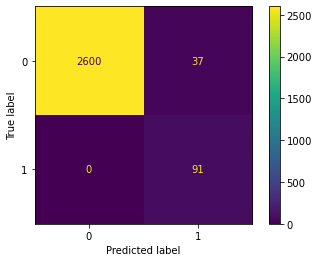

In [39]:
prediction = ann.predict(test_data_u)
acc = 100 * accuracy_score(test_target_u, prediction)

print("Accuracy of the Model: %g %%" %acc)
f1 = f1_score(test_target_u, prediction)
print("F1 Score of the Model:", f1)
print(classification_report(test_target_u, prediction))
ConfusionMatrixDisplay.from_predictions(test_target_u, prediction)

#### 4.1.2 Logistic Regression

In [42]:
def objective(trial):

    # Params
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
    if penalty == 'l1':
        solver = 'saga'
    else:
        solver = 'lbfgs'
    regularization = trial.suggest_float('logistic-regularization', 0.01, 10)
        
    # Create Trial Model
    logreg_trial = LogisticRegression(penalty=penalty, C=regularization, solver=solver, random_state=1, max_iter=5000)
    logreg_trial.fit(train_data_prep, train_target)

    # Predict by un-oversampled test data
    prediction = logreg_trial.predict(test_data_u)
    return f1_score(test_target_u, prediction)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-11 14:43:45,838] A new study created in memory with name: no-name-9abaa516-2f2f-4a25-8182-9dac0956c4d0
[I 2023-12-11 14:43:46,127] Trial 0 finished with value: 0.32083333333333336 and parameters: {'penalty': 'l2', 'logistic-regularization': 0.38541047181464066}. Best is trial 0 with value: 0.32083333333333336.
[I 2023-12-11 14:43:46,476] Trial 1 finished with value: 0.3283582089552239 and parameters: {'penalty': 'l2', 'logistic-regularization': 1.8800287943327096}. Best is trial 1 with value: 0.3283582089552239.
[I 2023-12-11 14:44:10,415] Trial 2 finished with value: 0.31712473572938693 and parameters: {'penalty': 'l1', 'logistic-regularization': 3.077837299516144}. Best is trial 1 with value: 0.3283582089552239.
[I 2023-12-11 14:44:10,768] Trial 3 finished with value: 0.32905982905982906 and parameters: {'penalty': 'l2', 'logistic-regularization': 4.755237189714238}. Best is trial 3 with value: 0.32905982905982906.
[I 2023-12-11 14:44:35,151] Trial 4 finished with value: 0

In [35]:
logreg = LogisticRegression(random_state=1, max_iter=10000)
logreg.fit(train_data_prep, train_target)
prediction = logreg.predict(test_data_prep)
acc = 100 * accuracy_score(test_target, prediction)
f1 = f1_score(test_target, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.90, accuracy 89.89 %


#### 4.1.3 Gaussian Naive Bayes

In [36]:
gnb = GaussianNB()
gnb.fit(train_data_prep, train_target)
prediction = gnb.predict(test_data_prep)
acc = 100 * accuracy_score(test_target, prediction)
f1 = f1_score(test_target, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.65, accuracy 52.94 %


#### 4.1.4 KNN

In [37]:
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_prep, train_target)
    prediction = knn.predict(test_data_prep)
    acc = 100 * accuracy_score(test_target, prediction)
    f1 = f1_score(test_target, prediction)
    print("Model Stats for k = %g: f1 = %.2f, accuracy %.2f %%" % (k, f1, acc))

Model Stats for k = 1: f1 = 0.96, accuracy 95.98 %
Model Stats for k = 2: f1 = 0.96, accuracy 96.34 %


Model Stats for k = 3: f1 = 0.94, accuracy 94.19 %
Model Stats for k = 4: f1 = 0.95, accuracy 94.89 %
Model Stats for k = 5: f1 = 0.94, accuracy 93.16 %
Model Stats for k = 6: f1 = 0.94, accuracy 93.73 %
Model Stats for k = 7: f1 = 0.93, accuracy 92.58 %
Model Stats for k = 8: f1 = 0.93, accuracy 92.90 %
Model Stats for k = 9: f1 = 0.92, accuracy 91.53 %
Model Stats for k = 10: f1 = 0.93, accuracy 91.99 %
Model Stats for k = 11: f1 = 0.92, accuracy 90.95 %
Model Stats for k = 12: f1 = 0.92, accuracy 91.38 %
Model Stats for k = 13: f1 = 0.91, accuracy 90.64 %
Model Stats for k = 14: f1 = 0.92, accuracy 91.16 %
Model Stats for k = 15: f1 = 0.91, accuracy 90.45 %
Model Stats for k = 16: f1 = 0.92, accuracy 90.91 %
Model Stats for k = 17: f1 = 0.91, accuracy 90.25 %
Model Stats for k = 18: f1 = 0.91, accuracy 90.68 %
Model Stats for k = 19: f1 = 0.91, accuracy 90.25 %
Model Stats for k = 20: f1 = 0.91, accuracy 90.62 %
Model Stats for k = 21: f1 = 0.91, accuracy 90.23 %
Model Stats for k =

In [38]:
k = 2

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_data_prep, train_target)
prediction = knn.predict(test_data_prep)
acc = 100 * accuracy_score(test_target, prediction)
f1 = f1_score(test_target, prediction)
print("Model Stats for k = %g: f1 = %.2f, accuracy %.2f %%" % (k, f1, acc))

Model Stats for k = 2: f1 = 0.96, accuracy 96.34 %


#### 4.1.5 Light GBM (LGBM)

In [39]:
lgbm = LGBMClassifier()
lgbm.fit(train_data_prep, train_target)
prediction = lgbm.predict(test_data_prep)
acc = 100 * accuracy_score(test_target, prediction)
f1 = f1_score(test_target, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

[LightGBM] [Info] Number of positive: 3980, number of negative: 3938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15810
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502652 -> initscore=0.010609
[LightGBM] [Info] Start training from score 0.010609


Model Stats: f1 = 0.98, accuracy 97.65 %


#### 4.1.6 XGB

In [40]:
xgb = XGBClassifier()
xgb.fit(train_data_prep, train_target)
prediction = xgb.predict(test_data_prep)
acc = 100 * accuracy_score(test_target, prediction)
f1 = f1_score(test_target, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.98, accuracy 97.84 %


#### 4.1.7 CatBoost

In [41]:
catboost = CatBoostClassifier(silent=True)
catboost.fit(train_data_prep, train_target)
prediction = catboost.predict(test_data_prep)
acc = 100 * accuracy_score(test_target, prediction)
f1 = f1_score(test_target, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.98, accuracy 97.61 %


### 4.2 Random OverSampling Data

#### 4.2.1 ANN

In [ ]:
import optuna
import sklearn
import sklearn.datasets
import sklearn.neural_network

def objective(trial):

    # Params
    n_layers = trial.suggest_int('n_layers', 1, 4)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))
        
    # Create Trial Model
    mlpc_trial = MLPClassifier(hidden_layer_sizes=tuple(layers), max_iter=1000, random_state=1)
    mlpc_trial.fit(train_data_prep_ros, train_target_ros)

    # Predict by un-oversampled test data
    prediction = mlpc_trial.predict(test_data_u_ros)
    return f1_score(test_target_u_ros, prediction)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-08 10:54:26,159] A new study created in memory with name: no-name-8bd05ffc-1250-4430-99d1-8433bc5bf794
[I 2023-12-08 10:54:30,719] Trial 0 finished with value: 0.8125000000000001 and parameters: {'n_layers': 3, 'n_units_0': 94, 'n_units_1': 62, 'n_units_2': 48}. Best is trial 0 with value: 0.8125000000000001.
[I 2023-12-08 10:54:33,401] Trial 1 finished with value: 0.7982456140350876 and parameters: {'n_layers': 3, 'n_units_0': 21, 'n_units_1': 13, 'n_units_2': 43}. Best is trial 0 with value: 0.8125000000000001.
[I 2023-12-08 10:54:41,567] Trial 2 finished with value: 0.794759825327511 and parameters: {'n_layers': 1, 'n_units_0': 55}. Best is trial 0 with value: 0.8125000000000001.
[I 2023-12-08 10:54:51,270] Trial 3 finished with value: 0.7520661157024793 and parameters: {'n_layers': 1, 'n_units_0': 11}. Best is trial 0 with value: 0.8125000000000001.
[I 2023-12-08 10:54:58,912] Trial 4 finished with value: 0.8198198198198199 and parameters: {'n_layers': 1, 'n_units_0': 35

In [ ]:
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value: 0.883495145631068
  Params: 
    n_layers: 4
    n_units_0: 94
    n_units_1: 83
    n_units_2: 13
    n_units_3: 65


In [43]:
ann_ros = MLPClassifier(hidden_layer_sizes=(94, 83, 13, 65), max_iter=10000, random_state=1)
ann_ros.fit(train_data_prep_ros, train_target_ros)
prediction = ann_ros.predict(test_data_prep_ros)
acc = 100 * accuracy_score(test_target_ros, prediction)
f1 = f1_score(test_target_ros, prediction)
print("Model Performance: f1 = %.2f, accuracy %.2f %%" % (f1, acc))
print(ann_ros.score(test_data_prep_ros, test_target_ros))
print(f1)

Model Performance: f1 = 0.99, accuracy 98.81 %
0.9880681818181818
0.9881154499151102


Accuracy of the Model: 99.1202 %
F1 Score of the Model: 0.883495145631068
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2637
           1       0.79      1.00      0.88        91

    accuracy                           0.99      2728
   macro avg       0.90      1.00      0.94      2728
weighted avg       0.99      0.99      0.99      2728



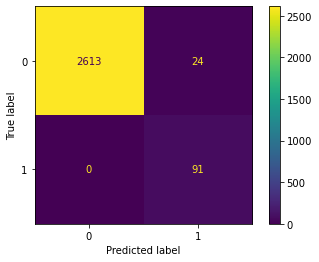

In [39]:
prediction = ann_ros.predict(test_data_u_ros)
acc = 100 * accuracy_score(test_target_u_ros, prediction)

print("Accuracy of the Model: %g %%" %acc)
f1 = f1_score(test_target_u_ros, prediction)
print("F1 Score of the Model:", f1)
print(classification_report(test_target_u_ros, prediction))
ConfusionMatrixDisplay.from_predictions(test_target_u_ros, prediction)

#### 4.2.2 Logistic Regression

In [44]:
logreg_ros = LogisticRegression(random_state=1, max_iter=10000)
logreg_ros.fit(train_data_prep_ros, train_target_ros)
prediction = logreg_ros.predict(test_data_prep_ros)
acc = 100 * accuracy_score(test_target_ros, prediction)
f1 = f1_score(test_target_ros, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.89, accuracy 88.86 %


#### 4.2.3 Gaussian Naive Bayes

In [45]:
gnb_ros = GaussianNB()
gnb_ros.fit(train_data_prep_ros, train_target_ros)
prediction = gnb_ros.predict(test_data_prep_ros)
acc = 100 * accuracy_score(test_target_ros, prediction)
f1 = f1_score(test_target_ros, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.65, accuracy 52.03 %


#### 4.2.4 KNN

In [46]:
for k in range(1, 31):
    knn_ros = KNeighborsClassifier(n_neighbors=k)
    knn_ros.fit(train_data_prep_ros, train_target_ros)
    prediction = knn_ros.predict(test_data_prep_ros)
    acc = 100 * accuracy_score(test_target_ros, prediction)
    f1 = f1_score(test_target_ros, prediction)
    print("Model Stats for k = %g: f1 = %.2f, accuracy %.2f %%" % (k, f1, acc))

Model Stats for k = 1: f1 = 0.98, accuracy 98.05 %
Model Stats for k = 2: f1 = 0.98, accuracy 98.05 %


Model Stats for k = 3: f1 = 0.97, accuracy 96.88 %
Model Stats for k = 4: f1 = 0.97, accuracy 96.88 %
Model Stats for k = 5: f1 = 0.96, accuracy 95.59 %
Model Stats for k = 6: f1 = 0.96, accuracy 95.59 %
Model Stats for k = 7: f1 = 0.95, accuracy 94.47 %
Model Stats for k = 8: f1 = 0.95, accuracy 94.47 %
Model Stats for k = 9: f1 = 0.94, accuracy 93.52 %
Model Stats for k = 10: f1 = 0.94, accuracy 93.52 %
Model Stats for k = 11: f1 = 0.93, accuracy 92.71 %
Model Stats for k = 12: f1 = 0.93, accuracy 92.71 %
Model Stats for k = 13: f1 = 0.92, accuracy 91.95 %
Model Stats for k = 14: f1 = 0.92, accuracy 91.95 %
Model Stats for k = 15: f1 = 0.92, accuracy 91.17 %
Model Stats for k = 16: f1 = 0.92, accuracy 91.17 %
Model Stats for k = 17: f1 = 0.91, accuracy 90.76 %
Model Stats for k = 18: f1 = 0.92, accuracy 91.17 %
Model Stats for k = 19: f1 = 0.91, accuracy 90.74 %
Model Stats for k = 20: f1 = 0.91, accuracy 90.74 %
Model Stats for k = 21: f1 = 0.91, accuracy 90.11 %
Model Stats for k =

In [47]:
k = 2

knn_ros = KNeighborsClassifier(n_neighbors=k)
knn_ros.fit(train_data_prep_ros, train_target_ros)
prediction = knn_ros.predict(test_data_prep_ros)
acc = 100 * accuracy_score(test_target_ros, prediction)
f1 = f1_score(test_target_ros, prediction)
print("Model Stats for k = %g: f1 = %.2f, accuracy %.2f %%" % (k, f1, acc))

Model Stats for k = 2: f1 = 0.98, accuracy 98.05 %


#### 4.2.5 Light GBM (LGBM)

In [48]:
lgbm_ros = LGBMClassifier()
lgbm_ros.fit(train_data_prep_ros, train_target_ros)
prediction = lgbm_ros.predict(test_data_prep_ros)
acc = 100 * accuracy_score(test_target_ros, prediction)
f1 = f1_score(test_target_ros, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

[LightGBM] [Info] Number of positive: 3980, number of negative: 3938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15805
[LightGBM] [Info] Number of data points in the train set: 7918, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502652 -> initscore=0.010609
[LightGBM] [Info] Start training from score 0.010609


Model Stats: f1 = 0.99, accuracy 98.75 %


In [33]:
import optuna
import lightgbm as lgb
import sklearn

def objective(trial):
    dtrain = lgb.Dataset(train_data_prep_ros, label=train_target_ros)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(test_data_u_ros)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(test_target_u_ros, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-12-08 10:16:48,241] A new study created in memory with name: no-name-9103165b-b03a-4ebf-961b-e59463ac22fa
[I 2023-12-08 10:16:48,937] Trial 0 finished with value: 0.9926686217008798 and parameters: {'lambda_l1': 1.1040871146498405e-07, 'lambda_l2': 3.293059790943949e-08, 'num_leaves': 152, 'feature_fraction': 0.7305107307632857, 'bagging_fraction': 0.9127439272050993, 'bagging_freq': 5, 'min_child_samples': 77}. Best is trial 0 with value: 0.9926686217008798.
[I 2023-12-08 10:16:50,020] Trial 1 finished with value: 0.9970674486803519 and parameters: {'lambda_l1': 1.5123915041045091e-05, 'lambda_l2': 0.0031079972517546284, 'num_leaves': 246, 'feature_fraction': 0.703764185148986, 'bagging_fraction': 0.7714032550002234, 'bagging_freq': 6, 'min_child_samples': 22}. Best is trial 1 with value: 0.9970674486803519.
[I 2023-12-08 10:16:50,509] Trial 2 finished with value: 0.9941348973607038 and parameters: {'lambda_l1': 0.04515967202016958, 'lambda_l2': 2.1949366988289473e-08, 'num_le

Number of finished trials: 100
Best trial:
  Value: 0.999633431085044
  Params: 
    lambda_l1: 2.5730164324497303e-07
    lambda_l2: 9.341840190177615e-06
    num_leaves: 200
    feature_fraction: 0.4815712133355077
    bagging_fraction: 0.7201145525570019
    bagging_freq: 3
    min_child_samples: 8


In [38]:
param = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "lambda_l1": 2.5730164324497303e-07,
    "lambda_l2": 9.341840190177615e-06,
    "num_leaves": 200,
    "feature_fraction": 0.4815712133355077,
    "bagging_fraction": 0.7201145525570019,
    "bagging_freq": 3,
    "min_child_samples": 8,
}    

lgbm_ros = LGBMClassifier()
dtrain = lgb.Dataset(train_data_prep_ros, label=train_target_ros)

# lgbm_ros.set_params(param)
# lgbm_ros.fit(train_data_prep_ros, train_target_ros)
lgbm_ros = lgb.train(param, dtrain)
prediction = lgbm_ros.predict(test_data_prep_ros)
pred_labels = np.rint(prediction)
acc = 100 * accuracy_score(test_target_ros, pred_labels)
f1 = f1_score(test_target_ros, pred_labels)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 1.00, accuracy 99.73 %


Accuracy of the Model: 99.7348 %
F1 Score of the Model: 0.9973343488194973
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2661
           1       0.99      1.00      1.00      2619

    accuracy                           1.00      5280
   macro avg       1.00      1.00      1.00      5280
weighted avg       1.00      1.00      1.00      5280



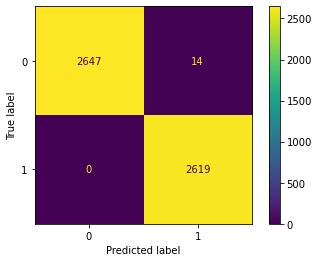

In [42]:
prediction = lgbm_ros.predict(test_data_prep_ros)
prediction = np.rint(prediction)
acc = 100 * accuracy_score(test_target_ros, prediction)

print("Accuracy of the Model: %g %%" %acc)
f1 = f1_score(test_target_ros, prediction)
print("F1 Score of the Model:", f1)
print(classification_report(test_target_ros, prediction))
ConfusionMatrixDisplay.from_predictions(test_target_ros, prediction)

Accuracy of the Model: 99.9633 %
F1 Score of the Model: 0.994535519125683
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2637
           1       0.99      1.00      0.99        91

    accuracy                           1.00      2728
   macro avg       0.99      1.00      1.00      2728
weighted avg       1.00      1.00      1.00      2728



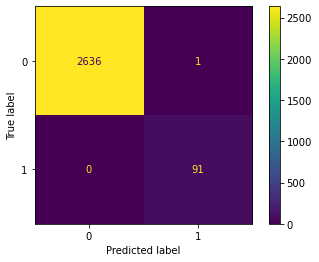

In [41]:
prediction = lgbm_ros.predict(test_data_u_ros)
prediction = np.rint(prediction)
acc = 100 * accuracy_score(test_target_u_ros, prediction)

print("Accuracy of the Model: %g %%" %acc)
f1 = f1_score(test_target_u_ros, prediction)
print("F1 Score of the Model:", f1)
print(classification_report(test_target_u_ros, prediction))
ConfusionMatrixDisplay.from_predictions(test_target_u_ros, prediction)

#### 4.2.6 XGB

In [57]:
import xgboost as xgb


def objective(trial):
    dtrain = xgb.DMatrix(train_data_prep_ros, label=train_target_ros)
    dtest = xgb.DMatrix(test_data_u_ros, label=test_target_u_ros)

    # param = {
    #     "objective": "reg:squarederror",
    #     "n_estimators": 1000,
    #     "verbosity": 0,
    #     "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
    #     "max_depth": trial.suggest_int("max_depth", 1, 10),
    #     "subsample": trial.suggest_float("subsample", 0.05, 1.0),
    #     "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
    #     "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    # }

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical(
            "grow_policy", ["depthwise", "lossguide"]
        )

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical(
            "sample_type", ["uniform", "weighted"]
        )
        param["normalize_type"] = trial.suggest_categorical(
            "normalize_type", ["tree", "forest"]
        )
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    xgb_trial = xgb.train(param, dtrain)
    preds = xgb_trial.predict(dtest)
    pred_labels = np.rint(preds)
    f1 = f1_score(test_target_u_ros, pred_labels)
    return f1
    # accuracy = accuracy_score(test_target_u_ros, pred_labels)
    # return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=500)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-12-11 15:32:26,006] A new study created in memory with name: no-name-414da387-a2ae-45cc-9efe-1812a603716c
[I 2023-12-11 15:32:26,197] Trial 0 finished with value: 0.4607594936708861 and parameters: {'booster': 'dart', 'lambda': 2.2224779270355533e-05, 'alpha': 0.002521538287847134, 'subsample': 0.9888302301605523, 'colsample_bytree': 0.7420339382812977, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.015392313188325851, 'gamma': 2.5533392208834974e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 6.680336158227594e-06, 'skip_drop': 0.05369793724726002}. Best is trial 0 with value: 0.4607594936708861.
[I 2023-12-11 15:32:26,272] Trial 1 finished with value: 0.0645619013834693 and parameters: {'booster': 'gbtree', 'lambda': 1.0740637858446991e-07, 'alpha': 2.8041704435669973e-08, 'subsample': 0.4073066617244937, 'colsample_bytree': 0.4711109822902261, 'max_depth': 3, 'min_child_weight': 4, 'eta': 4.4993624957397024e-07, 'gamma': 0.0

Number of finished trials: 500
Best trial:
  Value: 0.8625592417061612
  Params: 
    booster: dart
    lambda: 4.417999250476684e-08
    alpha: 0.33023980019859517
    subsample: 0.9858351632430862
    colsample_bytree: 0.2455559665156103
    max_depth: 7
    min_child_weight: 2
    eta: 0.9974709552114978
    gamma: 0.00720894368593397
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: forest
    rate_drop: 8.652672215095307e-06
    skip_drop: 0.0009734187624589334


In [53]:
params = {
    "verbosity": 0, 
    "objective": "binary:logistic",
    "tree_method": "exact",
    'booster': 'dart',
    'lambda': 9.694862932464782e-08,
    'alpha': 0.0001919883114288561,
    'subsample': 0.45450211317485895,
    'colsample_bytree': 0.9425643136675205,
    'max_depth': 9,
    'min_child_weight': 2,
    'eta': 0.9997815353445304,
    'gamma': 5.752245289272137e-07,
    'grow_policy': 'depthwise',
    'sample_type': 'uniform',
    'normalize_type': 'forest',
    'rate_drop': 0.000401963488976033,
    'skip_drop': 3.0150000495334705e-08,
}

dtrain = xgb.DMatrix(train_data_prep_ros, label=train_target_ros)
dtest = xgb.DMatrix(test_data_u_ros, label=test_target_u_ros)

xgb_ros = xgb.train(params, dtrain)
preds = xgb_ros.predict(dtest)
pred_labels = np.rint(preds)
acc = 100 * accuracy_score(test_target_u_ros, pred_labels)
f1 = f1_score(test_target_u_ros, pred_labels)

# xgb_ros = xgb.train(trial.params, dtrain)
# prediction = xgb_ros.predict(dtest)
# pred_labels = np.rint(prediction)
# acc = 100 * accuracy_score(test_target_u_ros, pred_labels)
# f1 = f1_score(test_target_u_ros, pred_labels)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.80, accuracy 98.35 %


#### 4.2.7 CatBoost

In [50]:
catboost_ros = CatBoostClassifier(silent=True)
catboost_ros.fit(train_data_prep_ros, train_target_ros)
prediction = catboost_ros.predict(test_data_prep_ros)
acc = 100 * accuracy_score(test_target_ros, prediction)
f1 = f1_score(test_target_ros, prediction)
print("Model Stats: f1 = %.2f, accuracy %.2f %%" % (f1, acc))

Model Stats: f1 = 0.99, accuracy 98.64 %


## 5. Model Evaluation

In Model Evaluation, the models would be evaluated by two sets of test data and target. The set from Oversampling, and one from the original data.

This is done to clearly see the actual accuracy of the model and showcase the overfitting model. Oversampling, though useful for this project may cause some models to overfit.

Therefore we would test the model that is fitted with oversampling data with both oversampling test data and original test data which undergone the same preprocessing except Oversampling.

In [35]:
def model_evaluation(model, test_data, test_target):
    prediction = model.predict(test_data)
    acc = 100 * accuracy_score(test_target, prediction)

    print("Accuracy of the Model: %g %%" %acc)
    f1 = f1_score(test_target, prediction)
    print("F1 Score of the Model:", f1)
    print(classification_report(test_target, prediction))
    ConfusionMatrixDisplay.from_predictions(test_target, prediction)

### 5.1 SMOTE Data

#### 5.1.1 ANN

OverSampling Test

Accuracy of the Model: 98.2197 %
F1 Score of the Model: 0.9823639774859289
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2661
           1       0.97      1.00      0.98      2619

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.98      0.98      0.98      5280



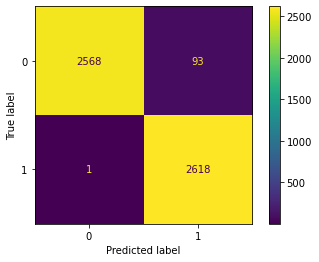

In [37]:
model_evaluation(ann, test_data_prep, test_target)

Normal Sampling Test

Accuracy of the Model: 98.3138 %
F1 Score of the Model: 0.7982456140350876
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2637
           1       0.66      1.00      0.80        91

    accuracy                           0.98      2728
   macro avg       0.83      0.99      0.89      2728
weighted avg       0.99      0.98      0.98      2728



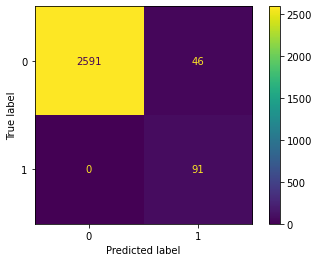

In [36]:
model_evaluation(ann, test_data_u, test_target_u)

#### 5.1.2 Logistic Regression

OverSampling Test

Accuracy of the Model: 89.8864 %
F1 Score of the Model: 0.9000748502994012
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2661
           1       0.88      0.92      0.90      2619

    accuracy                           0.90      5280
   macro avg       0.90      0.90      0.90      5280
weighted avg       0.90      0.90      0.90      5280



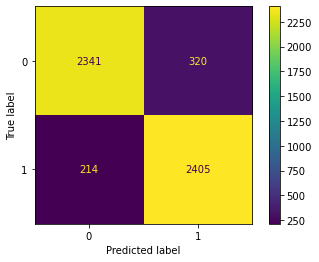

In [54]:
model_evaluation(logreg, test_data_prep, test_target)

Normal Sampling Test

Accuracy of the Model: 88.3065 %
F1 Score of the Model: 0.3255813953488371
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      2637
           1       0.20      0.85      0.33        91

    accuracy                           0.88      2728
   macro avg       0.60      0.87      0.63      2728
weighted avg       0.97      0.88      0.92      2728



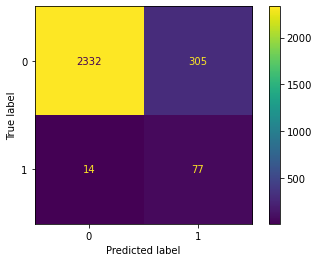

In [55]:
model_evaluation(logreg, test_data_u, test_target_u)

#### 5.1.3 Gaussian Naive Bayes

OverSampling Test

Accuracy of the Model: 52.9356 %
F1 Score of the Model: 0.6548131684956244
              precision    recall  f1-score   support

           0       0.63      0.16      0.26      2661
           1       0.51      0.90      0.65      2619

    accuracy                           0.53      5280
   macro avg       0.57      0.53      0.46      5280
weighted avg       0.57      0.53      0.46      5280



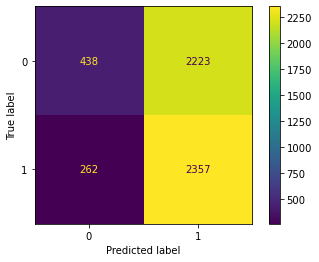

In [56]:
model_evaluation(gnb, test_data_prep, test_target)

Normal Sampling Test

Accuracy of the Model: 19.9413 %
F1 Score of the Model: 0.06825938566552901
              precision    recall  f1-score   support

           0       0.98      0.18      0.30      2637
           1       0.04      0.88      0.07        91

    accuracy                           0.20      2728
   macro avg       0.51      0.53      0.18      2728
weighted avg       0.95      0.20      0.29      2728



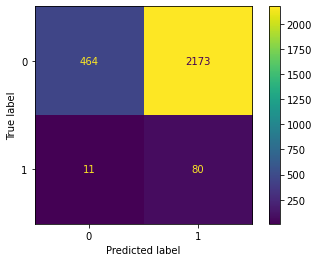

In [57]:
model_evaluation(gnb, test_data_u, test_target_u)

#### 5.1.4 KNN

OverSampling Test

Accuracy of the Model: 96.3447 %
F1 Score of the Model: 0.9643845727994096
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2661
           1       0.93      1.00      0.96      2619

    accuracy                           0.96      5280
   macro avg       0.97      0.96      0.96      5280
weighted avg       0.97      0.96      0.96      5280



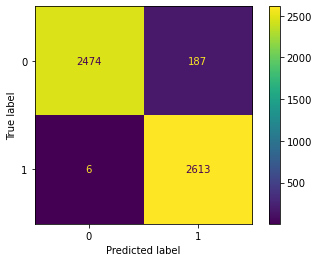

In [58]:
model_evaluation(knn, test_data_prep, test_target)

Normal Sampling Test

Accuracy of the Model: 96.6642 %
F1 Score of the Model: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2637
           1       0.50      1.00      0.67        91

    accuracy                           0.97      2728
   macro avg       0.75      0.98      0.82      2728
weighted avg       0.98      0.97      0.97      2728



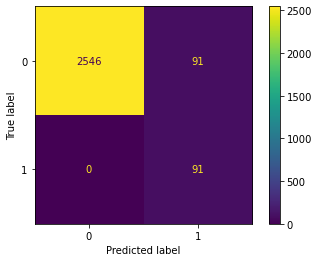

In [59]:
model_evaluation(knn, test_data_u, test_target_u)

#### 5.1.5 Light GBM (LGBM)

OverSampling Test

Accuracy of the Model: 97.6515 %
F1 Score of the Model: 0.9768483943241224
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2661
           1       0.96      1.00      0.98      2619

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.98      0.98      0.98      5280



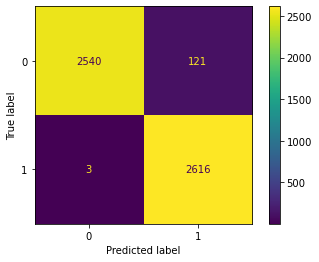

In [60]:
model_evaluation(lgbm, test_data_prep, test_target)

Normal Sampling Test

Accuracy of the Model: 97.8006 %
F1 Score of the Model: 0.7520661157024793
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2637
           1       0.60      1.00      0.75        91

    accuracy                           0.98      2728
   macro avg       0.80      0.99      0.87      2728
weighted avg       0.99      0.98      0.98      2728



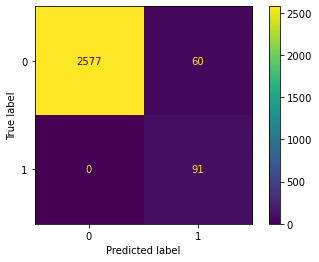

In [61]:
model_evaluation(lgbm, test_data_u, test_target_u)

#### 5.1.6 XGB

OverSampling Test

Accuracy of the Model: 97.8409 %
F1 Score of the Model: 0.9786836200448765
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2661
           1       0.96      1.00      0.98      2619

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.98      0.98      0.98      5280



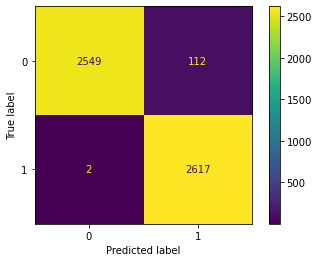

In [62]:
model_evaluation(xgb, test_data_prep, test_target)

Normal Sampling Test

Accuracy of the Model: 98.0572 %
F1 Score of the Model: 0.774468085106383
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2637
           1       0.63      1.00      0.77        91

    accuracy                           0.98      2728
   macro avg       0.82      0.99      0.88      2728
weighted avg       0.99      0.98      0.98      2728



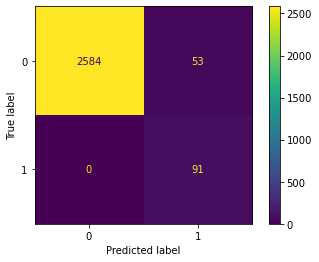

In [63]:
model_evaluation(xgb, test_data_u, test_target_u)

#### 5.1.7 CatBoost

OverSampling Test

Accuracy of the Model: 97.6136 %
F1 Score of the Model: 0.9764925373134328
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2661
           1       0.95      1.00      0.98      2619

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.98      0.98      0.98      5280



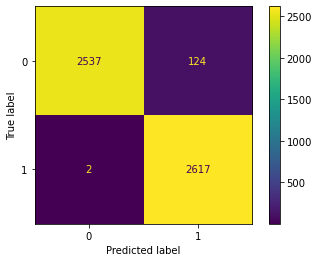

In [64]:
model_evaluation(catboost, test_data_prep, test_target)

Normal Sampling Test

Accuracy of the Model: 97.8006 %
F1 Score of the Model: 0.7520661157024793
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2637
           1       0.60      1.00      0.75        91

    accuracy                           0.98      2728
   macro avg       0.80      0.99      0.87      2728
weighted avg       0.99      0.98      0.98      2728



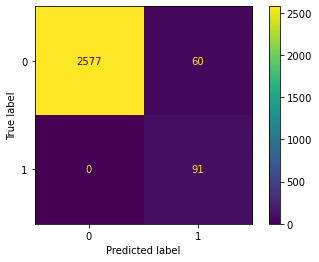

In [65]:
model_evaluation(catboost, test_data_u, test_target_u)

### 5.2 Random OverSampling Data

#### 5.2.1 ANN

OverSampling Test

Accuracy of the Model: 98.4659 %
F1 Score of the Model: 0.9847715736040609
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2661
           1       0.97      1.00      0.98      2619

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.99      0.98      0.98      5280



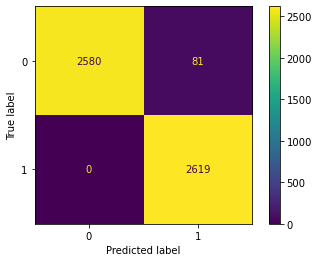

In [66]:
model_evaluation(ann_ros, test_data_prep_ros, test_target_ros)

Normal Sampling Test

Accuracy of the Model: 99.1202 %
F1 Score of the Model: 0.883495145631068
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2637
           1       0.79      1.00      0.88        91

    accuracy                           0.99      2728
   macro avg       0.90      1.00      0.94      2728
weighted avg       0.99      0.99      0.99      2728



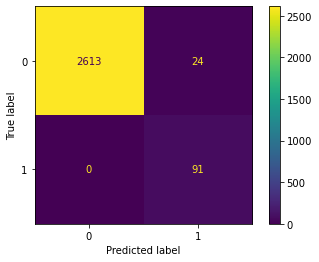

In [40]:
model_evaluation(ann_ros, test_data_u_ros, test_target_u_ros)

#### 5.2.2 Logistic Regression

OverSampling Test

Accuracy of the Model: 88.8636 %
F1 Score of the Model: 0.8903803131991052
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2661
           1       0.87      0.91      0.89      2619

    accuracy                           0.89      5280
   macro avg       0.89      0.89      0.89      5280
weighted avg       0.89      0.89      0.89      5280



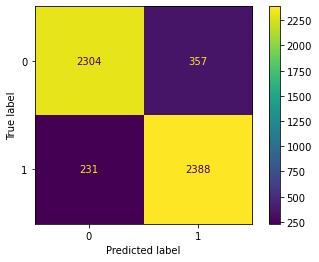

In [68]:
model_evaluation(logreg_ros, test_data_prep_ros, test_target_ros)

Normal Sampling Test

Accuracy of the Model: 87.39 %
F1 Score of the Model: 0.31474103585657365
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2637
           1       0.19      0.87      0.31        91

    accuracy                           0.87      2728
   macro avg       0.59      0.87      0.62      2728
weighted avg       0.97      0.87      0.91      2728



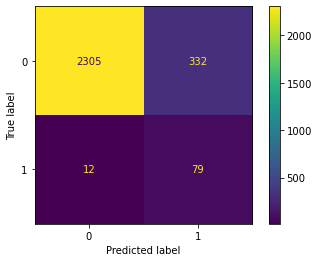

In [69]:
model_evaluation(logreg_ros, test_data_u_ros, test_target_u_ros)

#### 5.2.3 Gaussian Naive Bayes

OverSampling Test

Accuracy of the Model: 52.0265 %
F1 Score of the Model: 0.6500897914076529
              precision    recall  f1-score   support

           0       0.60      0.15      0.24      2661
           1       0.51      0.90      0.65      2619

    accuracy                           0.52      5280
   macro avg       0.55      0.52      0.44      5280
weighted avg       0.55      0.52      0.44      5280



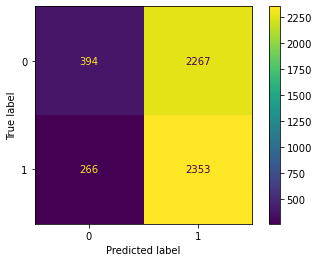

In [70]:
model_evaluation(gnb_ros, test_data_prep_ros, test_target_ros)

Normal Sampling Test

Accuracy of the Model: 18.6584 %
F1 Score of the Model: 0.0688208140998741
              precision    recall  f1-score   support

           0       0.98      0.16      0.28      2637
           1       0.04      0.90      0.07        91

    accuracy                           0.19      2728
   macro avg       0.51      0.53      0.17      2728
weighted avg       0.95      0.19      0.27      2728



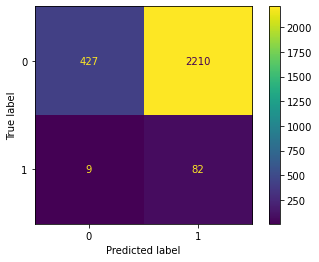

In [71]:
model_evaluation(gnb_ros, test_data_u_ros, test_target_u_ros)

#### 5.2.4 KNN

OverSampling Test

Accuracy of the Model: 98.0492 %
F1 Score of the Model: 0.980715221868564
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2661
           1       0.96      1.00      0.98      2619

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.98      0.98      0.98      5280



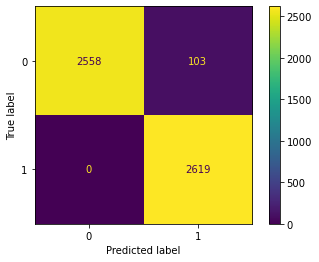

In [72]:
model_evaluation(knn_ros, test_data_prep_ros, test_target_ros)

Normal Sampling Test

Accuracy of the Model: 97.8372 %
F1 Score of the Model: 0.7551867219917012
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2637
           1       0.61      1.00      0.76        91

    accuracy                           0.98      2728
   macro avg       0.80      0.99      0.87      2728
weighted avg       0.99      0.98      0.98      2728



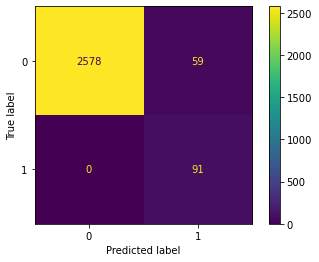

In [73]:
model_evaluation(knn_ros, test_data_u_ros, test_target_u_ros)

#### 5.2.5 Light GBM (LGBM)

OverSampling Test

In [39]:
model_evaluation(lgbm_ros, test_data_prep_ros, test_target_ros)

NameError: name 'model_evaluation' is not defined

Normal Sampling Test

Accuracy of the Model: 99.0103 %
F1 Score of the Model: 0.8708133971291866
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2637
           1       0.77      1.00      0.87        91

    accuracy                           0.99      2728
   macro avg       0.89      0.99      0.93      2728
weighted avg       0.99      0.99      0.99      2728



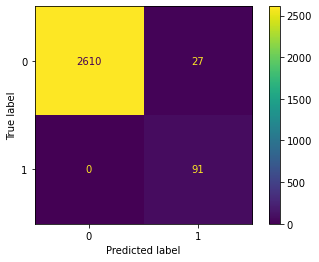

In [75]:
model_evaluation(lgbm_ros, test_data_u_ros, test_target_u_ros)

#### 5.2.6 XGB

OverSampling Test

Accuracy of the Model: 98.9205 %
F1 Score of the Model: 0.9892351274787535
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2661
           1       0.98      1.00      0.99      2619

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



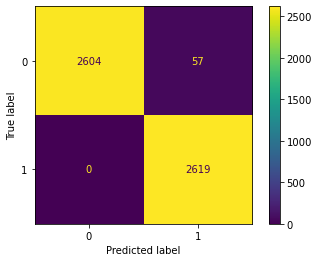

In [76]:
model_evaluation(xgb_ros, test_data_prep_ros, test_target_ros)

Normal Sampling Test

Accuracy of the Model: 99.2669 %
F1 Score of the Model: 0.9009900990099009
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2637
           1       0.82      1.00      0.90        91

    accuracy                           0.99      2728
   macro avg       0.91      1.00      0.95      2728
weighted avg       0.99      0.99      0.99      2728



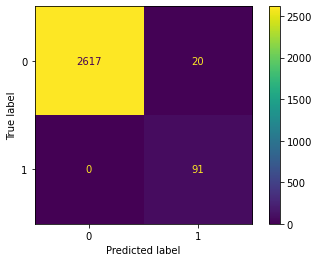

In [77]:
model_evaluation(xgb_ros, test_data_u_ros, test_target_u_ros)

#### 5.2.7 CatBoost

OverSampling Test

Accuracy of the Model: 98.6364 %
F1 Score of the Model: 0.9864406779661017
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2661
           1       0.97      1.00      0.99      2619

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



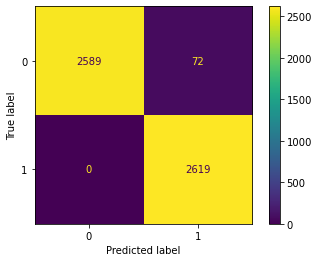

In [78]:
model_evaluation(catboost_ros, test_data_prep_ros, test_target_ros)

Normal Sampling Test

Accuracy of the Model: 98.8636 %
F1 Score of the Model: 0.8544600938967136
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2637
           1       0.75      1.00      0.85        91

    accuracy                           0.99      2728
   macro avg       0.87      0.99      0.92      2728
weighted avg       0.99      0.99      0.99      2728



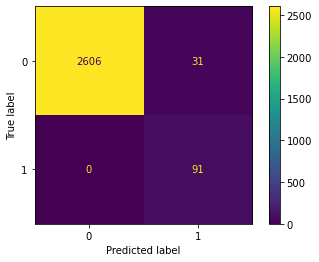

In [79]:
model_evaluation(catboost_ros, test_data_u_ros, test_target_u_ros)

## 6. Conclusion

It can be concluded that the model has an acceptable performance (measured by F1 Score) for both oversampling methods with above Standardization and PCA preprocessing.

It is observed that the model fitted with RandomOverSampling sample group is significantly higher performance for gradient-boosting classification methods `LGBM`, `XGB`, and `CatBoost`. However it only returns a slightly higher performance for `MLPClassifier (ANN)`.

It is also observed that the classification method `ANN` has the highest performance among non gradient-boosting models and the classification method `XGB` has the highest performance among all classification methods.

It is also noted that the gradient-boosting classification methods `LGBM`, `XGB`, and `CatBoost` has a significantly higher performance on the model fitted with RandomOverSampling sample group, compared to other methods with.